In [86]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

In [5]:
data, sr = librosa.load('audio/disclosure.wav')

In [43]:
len(data)

6236664

In [29]:
D = np.abs(librosa.stft(data, n_fft=2048))

In [30]:
D.shape

(1025, 12181)

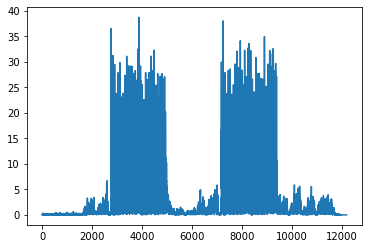

In [31]:
plt.plot(range(D.shape[1]), D[2,:])

In [67]:
Nfft = 256
stft = librosa.stft(data, n_fft=Nfft)
freqs = librosa.fft_frequencies(sr=sr, n_fft=Nfft)
t = librosa.frames_to_time(range(stft.shape[1]), n_fft=Nfft)


In [65]:
stft.shape

(129, 97448)

In [68]:
print(t, len(t))

[5.80498866e-03 2.90249433e-02 5.22448980e-02 ... 2.26267429e+03
 2.26269751e+03 2.26272073e+03] 97448


In [64]:
print(t[0]*len(t)/60/2)

4.714037792894937


In [42]:
print(1/60)

0.016666666666666666


In [44]:
1/0.00580499

172.2655852981659

In [35]:
print(freqs)

[    0.           86.1328125   172.265625    258.3984375   344.53125
   430.6640625   516.796875    602.9296875   689.0625      775.1953125
   861.328125    947.4609375  1033.59375    1119.7265625  1205.859375
  1291.9921875  1378.125      1464.2578125  1550.390625   1636.5234375
  1722.65625    1808.7890625  1894.921875   1981.0546875  2067.1875
  2153.3203125  2239.453125   2325.5859375  2411.71875    2497.8515625
  2583.984375   2670.1171875  2756.25       2842.3828125  2928.515625
  3014.6484375  3100.78125    3186.9140625  3273.046875   3359.1796875
  3445.3125     3531.4453125  3617.578125   3703.7109375  3789.84375
  3875.9765625  3962.109375   4048.2421875  4134.375      4220.5078125
  4306.640625   4392.7734375  4478.90625    4565.0390625  4651.171875
  4737.3046875  4823.4375     4909.5703125  4995.703125   5081.8359375
  5167.96875    5254.1015625  5340.234375   5426.3671875  5512.5
  5598.6328125  5684.765625   5770.8984375  5857.03125    5943.1640625
  6029.296875   6115.4

In [141]:
audio_data = 'audio/disclosure.wav'
z, sr_z = librosa.load(audio_data, offset = 122.0, duration = 10)

In [142]:
Audio(data=z, rate=sr_z)

In [143]:
z_harmonic, z_percussive = librosa.effects.hpss(z)

In [144]:
Audio(data=z_harmonic, rate=sr_z)

In [145]:
Audio(data=z_percussive, rate=sr_z)

In [146]:
def plot_spectrogram(signal, sampling_rate, slider_length, y_axis="linear"):
    plt.figure(figsize=(20, 10))
    librosa.display.specshow(signal, sr=sampling_rate, hop_length=slider_length, x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

In [153]:
Nfft = 30
slider_length=735
stft = librosa.stft(z_percussive, n_fft=Nfft, hop_length=slider_length)
S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
#S_db = np.abs(stft)**2

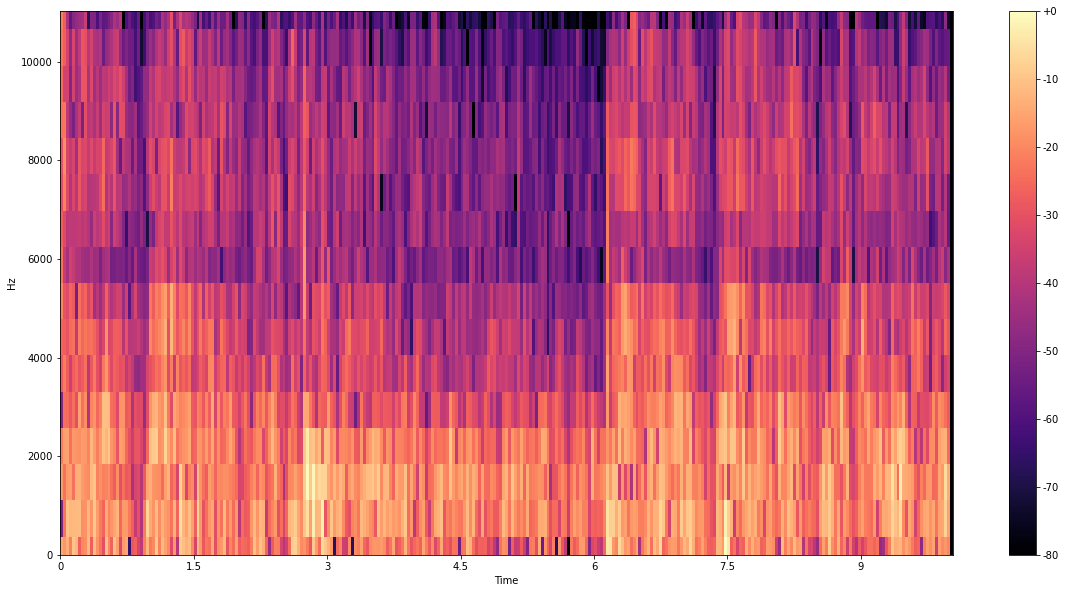

In [154]:
plot_spectrogram(S_db, sr_z, slider_length)

In [104]:
frame_length = slider_length / sr
print(frame_length)
fps = 1/frame_length
print(fps)

0.03333333333333333
30.0


In [101]:
22050/30

735.0

In [126]:
S_db.shape

(16, 301)

In [109]:
900/30

30.0

132300 6.0


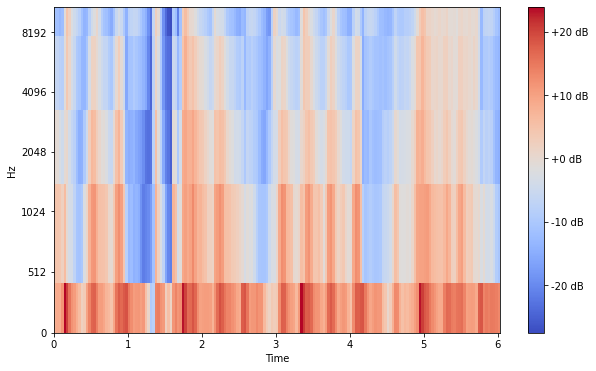

In [194]:
# Mel Spectrogramn_fft = 2048
audio_data = 'audio/disclosure.wav'
z, sr = librosa.load(audio_data, offset = 100, duration = 6)
print(len(z), len(z)/sr)
z_harmonic, z_percussive = librosa.effects.hpss(z)
hop_length = 735
Nfft = 2048
n_mels = 5
mel_spect = librosa.feature.melspectrogram(z, sr=sr, n_fft=Nfft, hop_length=hop_length, n_mels=n_mels)
log_mel_spect= librosa.power_to_db(mel_spect)
# Plot the Mel Spectrogram
def mel_grams():
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(log_mel_spect,
                             x_axis="time",
                             y_axis="mel",
                             sr=sr,
                            hop_length=hop_length)
    plt.colorbar(format="%+2.f dB")
    plt.show()
mel_grams()

In [195]:
Audio(data=z, rate=sr)

In [162]:
log_mel_spect.shape

(5, 301)

In [164]:
log_mel_spect[:,0]

array([-78.78429 , -46.678185, -48.22371 , -52.952583, -52.39129 ],
      dtype=float32)